In [14]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB,ComplementNB

In [15]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords as nltk_stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
df = pd.read_csv("/content/email.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df.columns.tolist()

['Category', 'Message']

In [18]:
def preprocess(text):
  test = text.lower()
  text = re.sub(r"http\S+|www\S+|https\S+", '',text)
  text = re.sub(r'\S+@\S+','',text)
  text = re.sub(r'\d+','',text)
  text = re.sub(r'[^\w\\s]','',text)
  text = re.sub(r'\s+','',text).strip()
  return text

In [19]:
df['clean'] = df['Message'].apply(preprocess)

In [20]:
X = df['clean']
y = df['Category']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
vect = TfidfVectorizer(stop_words='english',max_df=0.9,min_df=2)
X_train_acc = vect.fit_transform(X_train)
X_test_acc = vect.transform(X_test)

In [45]:
model = MultinomialNB()
model.fit(X_train_acc,y_train)

MultinomialNB()

In [46]:
y_pred = model.predict(X_test_acc)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8609865470852018

Classification Report:
               precision    recall  f1-score   support

         ham       0.86      1.00      0.93       958
        spam       1.00      0.01      0.03       157

    accuracy                           0.86      1115
   macro avg       0.93      0.51      0.48      1115
weighted avg       0.88      0.86      0.80      1115


Confusion Matrix:
 [[958   0]
 [155   2]]


<Axes: >

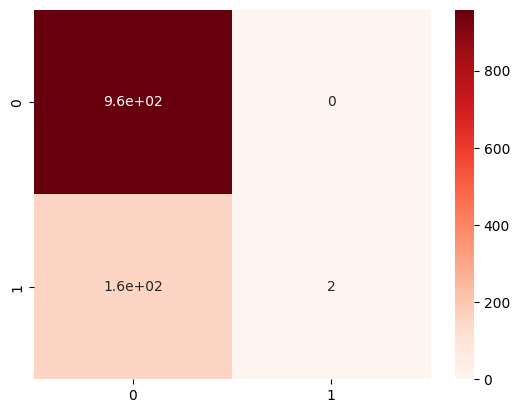

In [47]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Reds')

In [48]:
def pred_email(text):
  text = preprocess(text)
  vec = vect.transform([text])
  pred = model.predict(vec)[0]
  return pred

In [49]:
sample = ["free entry in 2 wkly!!!",
          "hey! can we meet at 10pm tomorrow?"]
for email in sample:
  print(f"\nemail: {email} \nPredict: {pred_email(email)}")


email: free entry in 2 wkly!!! 
Predict: ham

email: hey! can we meet at 10pm tomorrow? 
Predict: ham


In [50]:
print(df['Category'].value_counts())
#since huge data of ham there is imabalance and model ends up predicting more ham mails.

Category
ham               4825
spam               747
{"mode":"full"       1
Name: count, dtype: int64


In [80]:
# task2
df2 = pd.read_csv("/content/Reviews.csv")
df2.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [81]:
df2.columns.tolist()

['Id',
 'ProductId',
 'UserId',
 'ProfileName',
 'HelpfulnessNumerator',
 'HelpfulnessDenominator',
 'Score',
 'Time',
 'Summary',
 'Text']

In [63]:
def preprocess2(text):
  text = text.lower()
  text = re.sub(r'\S+@\S+','',text)
  text = re.sub(r"http\S+|www\S+|https\S+", '', text)
  text = re.sub(r'\d+','',text)
  text = re.sub(r'[^\w\\s]','',text)
  text = re.sub(r'\s+','',text).strip()
  return text

In [64]:
df2['new'] = df2['Text'].apply(preprocess2)

In [65]:
X = df2['new']
y = df2['Score']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [67]:
vect = TfidfVectorizer(stop_words='english',max_df=0.9,min_df=2)
X_train_vect = vect.fit_transform(X_train)
X_test_vect = vect.transform(X_test)

In [69]:
mod = MultinomialNB()
mod.fit(X_train_vect,y_train)
y_pred = mod.predict(X_test_vect)

In [70]:
print("accuracy score : ",accuracy_score(y_test,y_pred))
print('\nclassification report: \n',classification_report(y_test,y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

accuracy score :  0.7354232085213429

classification report: 
               precision    recall  f1-score   support

           1       1.00      0.30      0.46     10326
           2       1.00      0.16      0.28      5855
           3       1.00      0.22      0.36      8485
           4       1.00      0.30      0.46     16123
           5       0.71      1.00      0.83     72902

    accuracy                           0.74    113691
   macro avg       0.94      0.40      0.48    113691
weighted avg       0.81      0.74      0.68    113691


Confusion Matrix:
 [[ 3098     0     0     0  7228]
 [    0   964     1     1  4889]
 [    0     0  1867     2  6616]
 [    0     0     0  4781 11342]
 [    0     1     0     0 72901]]


In [77]:
def predict_score(text):
  text = preprocess(text)
  vec = vect.transform([text])
  pred = mod.predict(vec)[0]
  return pred

In [79]:
pred = predict_score('I like')
print(pred)
if pred>3:
    print('Best')
elif pred>2 :
    print("Average")
else:
    print("Below Avg")

5
Best
